In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [3]:
test = pd.read_csv('/gdrive/MyDrive/uni/FML/data-1/test.csv')
training_1 = pd.read_csv('/gdrive/MyDrive/uni/FML/data-1/training1.csv')
training_2 = pd.read_csv('/gdrive/MyDrive/uni/FML/data-1/training2.csv')

In [4]:
training = pd.concat([training_1,training_2])

In [5]:
### CNN Test
CNN_test=test.iloc[:,0:4096]

### Fill NaN values with mean
testCNN_imputer = SimpleImputer(strategy="mean")
testCNN_df = pd.DataFrame(testCNN_imputer.fit_transform(CNN_test),columns = CNN_test.columns)

### Normalisation
Ctest_Scaler = MinMaxScaler()
testCNN_df[:] = Ctest_Scaler.fit_transform(testCNN_df[:])
testCNN = testCNN_df.values

### PCA dimension reduction for using SVM 
test_PCA = PCA(n_components=50)
CNN_test_label = test_PCA.fit_transform(testCNN)

In [6]:
### Gist testing 
Gist_test = test.iloc[:,4096:]

### Fill NaN values with mean
testGist_imputer = SimpleImputer(strategy="mean")
testGist_df = pd.DataFrame(testGist_imputer.fit_transform(Gist_test),columns = Gist_test.columns)

### Normalisation
Gtest_Scaler = MinMaxScaler()
testGist_df[:] = Gtest_Scaler.fit_transform(testGist_df[:])
testGIST = testGist_df.values

### PCA dimension reduction for using SVM 
test_PCAG = PCA(n_components=50)
GIST_test_label = test_PCAG.fit_transform(testGIST)

**Trainig the Data and filing the NaN values with the mean value** 

In [7]:
### Training1 CNN
t1_CNN = training.iloc[:600,0:4096]
t1_CNN_df = pd.DataFrame(t1_CNN)

### Normalisation
t1C_scaler = MinMaxScaler()
t1_CNN_df[:] = t1C_scaler.fit_transform(t1_CNN_df[:])
t1CNN = t1_CNN_df.values

### PCA dimension reduction for using SVM 
t1CP = PCA(n_components=50)
t1CLable = t1CP.fit_transform(testGIST)

In [8]:
### Training1 Gist
t1_Gist = training.iloc[:600,4096:-2]
t1_Gist_df = pd.DataFrame(t1_Gist)

### Normalisation
t1G_scaler = MinMaxScaler()
t1_Gist_df[:] = t1G_scaler.fit_transform(t1_Gist_df[:])
t1Gist = t1_Gist_df.values

### PCA dimension reduction for using SVM 
t1CG = PCA(n_components=50)
t1GLable = t1CG.fit_transform(t1Gist)

In [9]:
### Training2 CNN
t2_CNN = training.iloc[600:,0:4096]

### Fill NaN values with mean
t2_imputer = SimpleImputer(strategy="mean")
t2_CNN_df= pd.DataFrame(t2_imputer.fit_transform(t2_CNN),columns = t2_CNN.columns)

### Normalisation
t2_Scaler = MinMaxScaler()
t2_CNN_df[:] = t2_Scaler.fit_transform(t2_CNN_df[:])
t2CNN= t2_CNN_df[:].values

### PCA dimension reduction for using SVM 
t2_PCAC = PCA(n_components=50)
t2CLable = t2_PCAC.fit_transform(t2CNN)

In [10]:
### Training2 Gist
t2_Gist = training.iloc[600:,4096:-2]

### Fill NaN values with mean
t2_imputer = SimpleImputer(strategy="mean")
t2_Gist_df= pd.DataFrame(t2_imputer.fit_transform(t2_Gist),columns = t2_Gist.columns)

### Normalisation
t2G_scaler = MinMaxScaler()
t2_Gist_df[:] = t2G_scaler.fit_transform(t2_Gist_df[:])
t2Gist = t2_Gist_df.values

### PCA dimension reduction for using SVM 
t2CG = PCA(n_components=50)
t2GLable = t2CG.fit_transform(t2Gist)

**Extracting the lables into separate array**

In [11]:
### Training  First Label 
t1_lable = training.iloc[:600,-2]
t1Lable = t1_lable.values.reshape(-1)
t1Lable.shape

(600,)

In [12]:
### Training  Second Label 
t2_lable = training.iloc[600:,-2]
t2Lable = t2_lable.values.reshape(-1)
t2Lable.shape

(2800,)

In [13]:
X = t2CLable 
y = t2Lable
X1 = t2GLable
print(X.shape,y.shape,X1.shape)

(2800, 50) (2800,) (2800, 50)


In [14]:
### SVM
k = svm.SVC(kernel="linear", C=10, gamma=0.001)
k.fit(X,y)
predictionsK = k.predict(CNN_test_label) 

### SVM accuracy 
scores = cross_val_score(k, X, y, scoring="accuracy")
np.mean(scores)

0.7375

In [15]:
### Save The Results
data_df  = pd.DataFrame(predictionsK)
data = data_df.to_csv('/gdrive/MyDrive/uni/FML/predictionsAssignment.csv')
data_df

,0
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0
...,...
1995,1.0
1996,1.0
1997,1.0
1998,0.0


In [16]:
### Check the accuracy based on the number of C
p=[]
s=[]
c = [1,10,100]
for i in range(3):
  classifier = svm.SVC(kernel='linear' , C = c[i])
  classifier.fit(X,y)
  p.append(classifier.predict(CNN_test_label))
  s.append(cross_val_score(classifier,X,y,scoring='accuracy'))
print(s)

[array([0.70892857, 0.74821429, 0.71428571, 0.74821429, 0.76428571]), array([0.7125    , 0.74821429, 0.71428571, 0.74821429, 0.76428571]), array([0.7125    , 0.75      , 0.71428571, 0.74821429, 0.76428571])]


In [17]:
### Check the accuracy based on the number of Gamma
pr=[]
sc=[]
ci = [0.0001,0.001,0.01,0.1,1]
for i in range(5):
  clf = svm.SVC(kernel='linear' , gamma = ci[i])
  clf.fit(X,y)
  pr.append(clf.predict(CNN_test_label))
  sc.append(cross_val_score(clf,X,y,scoring='accuracy'))
  np.mean(sc[i])
print(sc)

[array([0.70892857, 0.74821429, 0.71428571, 0.74821429, 0.76428571]), array([0.70892857, 0.74821429, 0.71428571, 0.74821429, 0.76428571]), array([0.70892857, 0.74821429, 0.71428571, 0.74821429, 0.76428571]), array([0.70892857, 0.74821429, 0.71428571, 0.74821429, 0.76428571]), array([0.70892857, 0.74821429, 0.71428571, 0.74821429, 0.76428571])]


In [18]:
### accuracy rate for Gist data on training_1
x =t1CLable[:600]
y = t1Lable
t1C = svm.SVC()
t1C.fit(x,y)
predictionT1 = t1C.predict(CNN_test_label)
score = cross_val_score(t1C, x, y, scoring='accuracy')
np.mean(score)

0.5066666666666667

In [19]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
X=t2CLable
y=t2Lable
title = "Learning Curve"
cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
train_sizes, train_scores, test_scores = learning_curve(SVC(gamma = 0.001),X,y,cv=cv,scoring='accuracy',n_jobs=4, train_sizes=np.linspace (.1, 1.0, 5))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

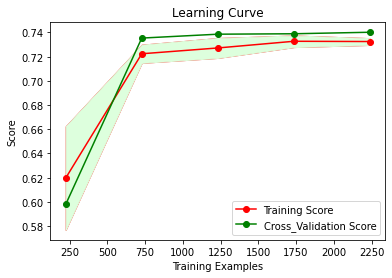

In [20]:
### Accuracy on the data set
plt.plot(train_sizes,train_mean,'o-',color='r',label="Training Score")
plt.plot(train_sizes,test_mean,'o-',color='g',label="Cross_Validation Score")
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='r')
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='#dfd')
plt.legend(loc='best')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title(title)
plt.show()